In [10]:
import matplotlib.pyplot as pylot
import pandas as pd
import numpy as np
import pylab as pylab
%matplotlib inline

# Practice
Try to use a polynomial regression with the dataset but this time with degree theree(cubic).
Does it result in better accuracy?

In [2]:
df=pd.read_csv("data/FuelConsumption.csv")
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [3]:
# veri setini ayırma işlemi
from sklearn.model_selection import train_test_split
#test: %20, train:%80
train, test=train_test_split(df, test_size=0.2)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

#burada degree'i belirliyoruz ve obje oluşturuyoruz
poly=PolynomialFeatures(degree=3)

In [5]:
train_x_poly=poly.fit_transform(train_x) # poly olarak 2. dereceye dataya dönüştürüyoruz
print(train_x_poly)

[[  1.      1.6     2.56    4.096]
 [  1.      5.     25.    125.   ]
 [  1.      5.     25.    125.   ]
 ...
 [  1.      6.     36.    216.   ]
 [  1.      6.2    38.44  238.328]
 [  1.      2.      4.      8.   ]]


In [6]:
clf=linear_model.LinearRegression() #linear reg objesi oluşturuldu

# Önceden oluşturulan train_x_poly ve train_y'yi kullanıyoruz
# train_x_poly, PolynomialFeatures ile dönüştürülmüş eğitim veri seti
# train_y, CO2 emisyon değerlerini içeren eğitim veri seti
train_y_=clf.fit(train_x_poly, train_y)

# The coefficients  and intercept
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         38.35089948  1.98951722 -0.31201123]]
Intercept:  [119.90373336]


<module 'matplotlib.pyplot' from 'd:\\Program\\Miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

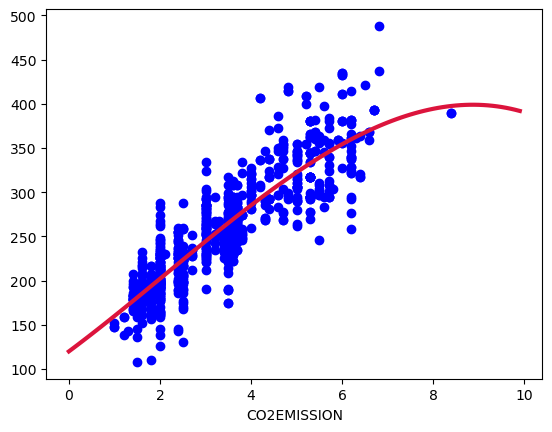

In [9]:
#Formül bulunan değerler üzerinden yazılır.
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")

#ne kadar nokta verirsek o kadar y değerinin karşılığını alırız
xx=np.arange(0.0, 10.0, 0.1)

yy=clf.intercept_[0]+ clf.coef_[0][1]*xx + clf.coef_[0][2]* np.power(xx, 2) + clf.coef_[0][3]* np.power(xx, 3)

pylot.plot(xx, yy, "crimson", lw=3)

pylot.xlabel("ENGINESIZE")
pylot.xlabel("CO2EMISSION")
pylot

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin tahmin ettiği değerler
test_x_poly=poly.transform(test_x)
predicted_y = clf.predict(test_x_poly)

# MAE, MSE, RMSE ve R2 Score hesaplama

mae = mean_absolute_error(test_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(test_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(test_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(test_y, predicted_y)
print("r²: ", r2)

MAE:  24.44940355553652
MSE:  1021.3579987093249
RMSE:  31.958692068188974
r²:  0.7512872496887641
